In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load Data
data = pd.read_csv('/Applications/MAMP/htdocs/local/kodingakademi/Python/python 3/machine learning/ML/Supervised learning/bank_customer.csv')

# 2. Preprocessing
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encoding categorical features
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

# 3. Define Features and Target
X = data.drop('Exited', axis=1)
y = data['Exited']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Predict on test data
y_pred = clf.predict(X_test)

# 7. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1599
           1       0.77      0.50      0.61       402

    accuracy                           0.87      2001
   macro avg       0.83      0.73      0.77      2001
weighted avg       0.86      0.87      0.86      2001

Confusion Matrix:
 [[1537   62]
 [ 199  203]]


Accuracy: 0.87
ROC AUC Score: 0.84


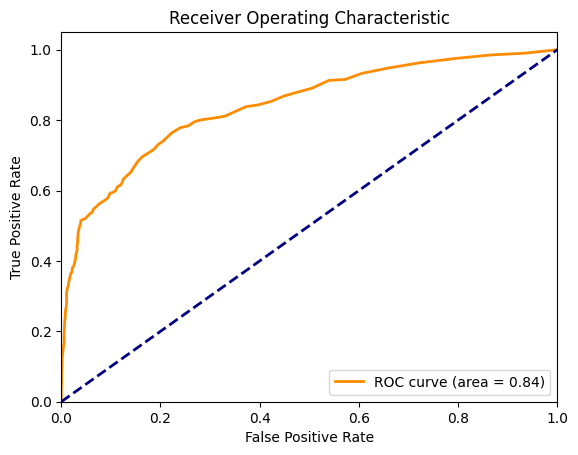

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Akurasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. ROC AUC Score
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Prediksi probabilitas untuk kelas 1
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0
